<a href="https://colab.research.google.com/github/zhouchun0105/credit-card-churners/blob/main/SUBMIT_creditcard_churners_team1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Customer Churn Analysis**

Team 1, Afternoon Session

Ana Maharjan, Ann Lu, Chun Zhou, Phyllis Cao, Yuhan Wang, Zijing Wang

2021/08/26





# **Introduction**

A manager at the bank wants to know why customers stop their credit card services. Our goal is to perform churn rate analysis to find the relationship between churning with customer attributes, customer activities, credit card attributes and bank services. This helps the bank reduce the cost of customer retention.

## **Following are a few questions that we aim to answer through our analysis**


1.	What is the overall churn rate of our customer?
2.	What is our user portrait like in terms of age, gender, educational level and income?
3.	What age group of customers has a higher tendency to churn?
4.	Which education category of customers has a higher tendency to churn?
5.	Which income category of customers has a higher tendency to churn?
6.	Which marriage type of customers has a higher tendency to churn?
7.	How does dependent count influence churn rate?
8.	Which card type of customers has a higher tendency to churn?
9.	How does credit limit affect churn rate?
10.	How does the number of contacts by sales representative in the past 12 month affect churn rate?
11.	How does time length as being our customer affect churn rate?
12.	How does the number of other existing service affect churn rate?
13.	How does transaction amount affect churn rate?
14.	How does revolving balance affect churn rate?


# **Data Source**

The dataset is from:
LEAPS https://leaps.analyttica.com/

Kaggle URL for your reference:
: https://www.kaggle.com/sakshigoyal7/credit-card-customers

# **Description of Data**

The data is about credit card customer, product and service. It has 21 features and 10128 rows. Customer demographic feature, customer card activity, credit card feature, and service feature are included. The detailed feature names and their explanations are shown below:



*CLIENTNUM*: Client number. Unique identifier for the customer holding the account

*Attrition_Flag*: customer activity variable - if the account is closed then 1 else 0

*Customer_Age*: Demographic variable - Customer's Age in Years

*Gender*: Demographic variable - M=Male, F=Female

*Dependent_count*: Demographic variable - Number of dependents

*Education_Level*: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

*Marital_Status*: Demographic variable - Married, Single, Divorced, Unknown

*Income_Category*: Demographic variable - Annual Income Category of the account holder (<  40𝐾,
40
K
,
 40K - 60K,  60𝐾−
60
K
−
 80K,  80𝐾−
80
K
−
 120K, > $120K, Unknown)

*Card_Category*: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

*Months_on_book*: Period of relationship with bank

*Total_Relationship_Count*: Total no. of products held by the customer

*Months_Inactive_12_mon*: No. of months inactive in the last 12 months

*Contacts_Count_12_mon*: No. of Contacts in the last 12 months

*Credit_Limit*: Credit Limit on the Credit Card

*Total_Revolving_Bal*: Total Revolving Balance on the Credit Card

*Avg_Open_To_Buy*: Open to Buy Credit Line (Average of last 12 months)

*Total_Amt_Chng_Q4_Q1*: Change in Transaction Amount (Q4 over Q1)

*Total_Trans_Amt*: Total Transaction Amount (Last 12 months)

*Total_Trans_Ct*: Total Transaction Count (Last 12 months)

*Total_Ct_Chng_Q4_Q1*: Change in Transaction Count (Q4 over Q1)

*Avg_Utilization_Ratio*: Average Card Utilization Ratio

#**Preliminary**

We first connect google colab with the Bigquery dataset. And we also import packages for later use.

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from IPython.display import Image

Then we take a preview of the dataset.

In [ ]:
%%bigquery --project=ba775-team-project
SELECT *
FROM `ba775-team-project.bankchurners.bankchurners`
LIMIT 10;

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,826077033,Attrited Customer,46,F,2,Unknown,Married,Less than $40K,Blue,42,1,0,4,2002.0,0,2002.0,0.803,2423,39,0.857,0.000,0.984680,0.01532
1,709918158,Existing Customer,43,M,3,High School,Married,$80K - $120K,Blue,23,5,6,1,12315.0,0,12315.0,0.895,2028,51,0.545,0.000,0.000086,0.99991
2,714757908,Existing Customer,46,M,4,Graduate,Married,$120K +,Silver,36,4,1,3,34516.0,1380,33136.0,0.660,2163,56,0.400,0.040,0.000088,0.99991
3,721067658,Existing Customer,40,M,4,Graduate,Married,$60K - $80K,Silver,36,6,1,3,27436.0,642,26794.0,0.705,4051,81,0.761,0.023,0.000088,0.99991
4,826451433,Existing Customer,42,M,4,Graduate,Single,$80K - $120K,Silver,38,2,1,3,34516.0,2273,32243.0,0.860,8502,103,0.717,0.066,0.000088,0.99991
5,708248358,Existing Customer,42,M,4,Graduate,Unknown,$60K - $80K,Silver,30,3,1,3,29937.0,0,29937.0,0.746,14863,109,0.627,0.000,0.000088,0.99991
6,717359208,Existing Customer,57,F,0,College,Married,Less than $40K,Blue,47,2,3,1,4945.0,1779,3166.0,0.536,4037,72,0.756,0.360,0.000091,0.99991
7,710822808,Existing Customer,51,M,0,College,Single,$80K - $120K,Blue,33,1,3,1,34516.0,1228,33288.0,0.747,7854,89,0.648,0.036,0.000091,0.99991
8,818235408,Existing Customer,30,M,0,College,Married,$60K - $80K,Blue,25,2,3,1,19534.0,0,19534.0,0.616,15634,118,0.639,0.000,0.000091,0.99991
9,789334458,Existing Customer,43,F,3,Graduate,Unknown,Unknown,Silver,33,3,1,3,34516.0,1858,32658.0,0.622,4197,67,0.523,0.054,0.000087,0.99991


### **Question 1: What is the overall churn rate of our customer?**

We want to find the churn rate for all customers regardless of their attributes. 

In [ ]:
%%bigquery churn_rate --project=ba775-team-project
/* churn rate */
SELECT SUM(CAST(Attrition_Flag = 'Attrited Customer' AS INT)) AS closed_account, 
COUNT(Attrition_Flag) AS total_account, 
SUM(CAST(Attrition_Flag = 'Attrited Customer' AS INT))/COUNT(Attrition_Flag)*100 
AS Churn_rate
FROM `ba775-team-project.bankchurners.bankchurners`
WHERE Attrition_Flag IS NOT NULL;

In [ ]:
churn_rate

,closed_account,total_account,Churn_rate
0,1627,10127,16.065962


As shown in the table, there are 1627 closed accounts and 10127 total accounts, so the churn rate is 16.065962%.

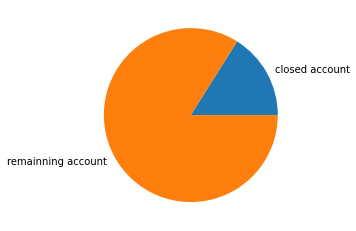

In [ ]:
import matplotlib.pyplot as plt
labels = 'closed account', 'remainning account'
sizes=[1627,10127-1627]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels)
plt.show()

### **Question 2: What is our user portrait like in terms of age, gender, educational level and income?**

Before we analyze how different features relate with churn rate, we perform customer portrait analysis. An overall analysis of our customer demographic demonstrate the following findings:


- Gender distribution: Distribution between male and female is close to equivalent with slightly more females than males

- Product and Gender Breakdown: Females tend to have more blue cards while male clients had the silver, gold and platinum cards

- Education: Majority of our client base have post secondary education (high school graduates) 

- Income: Majority of clients make less than $40,000 per year 

- Marital Status: Half of our client base are divorced, while 33% are single

- Age: Majority of customers are between the ages of 36-55

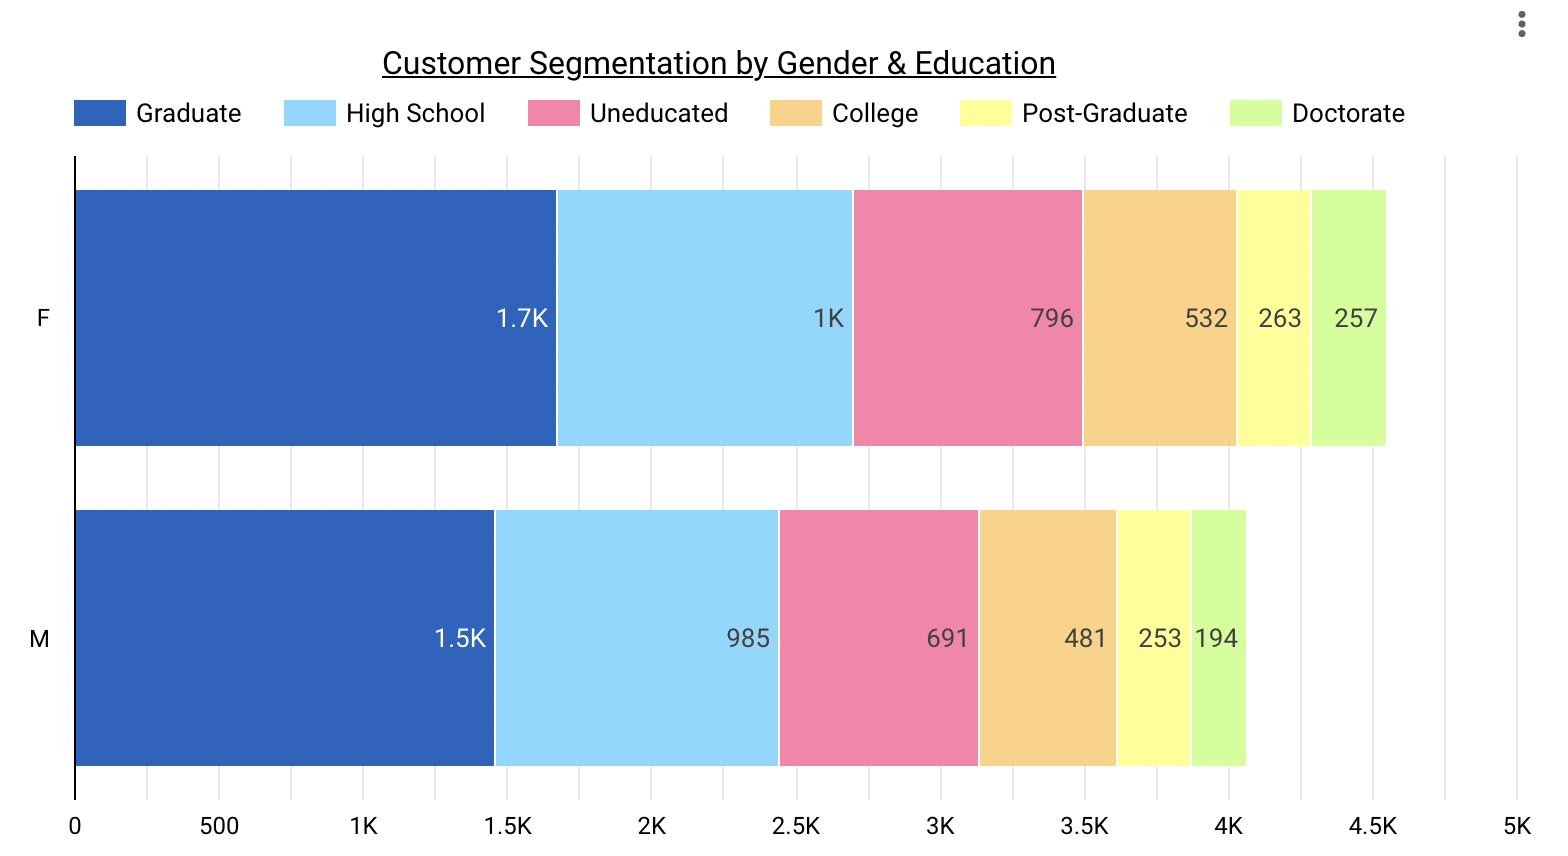

In [ ]:
Image(filename='/content/A.png')

Most of our customers have graduate degree, followed by the second as high school degree. 

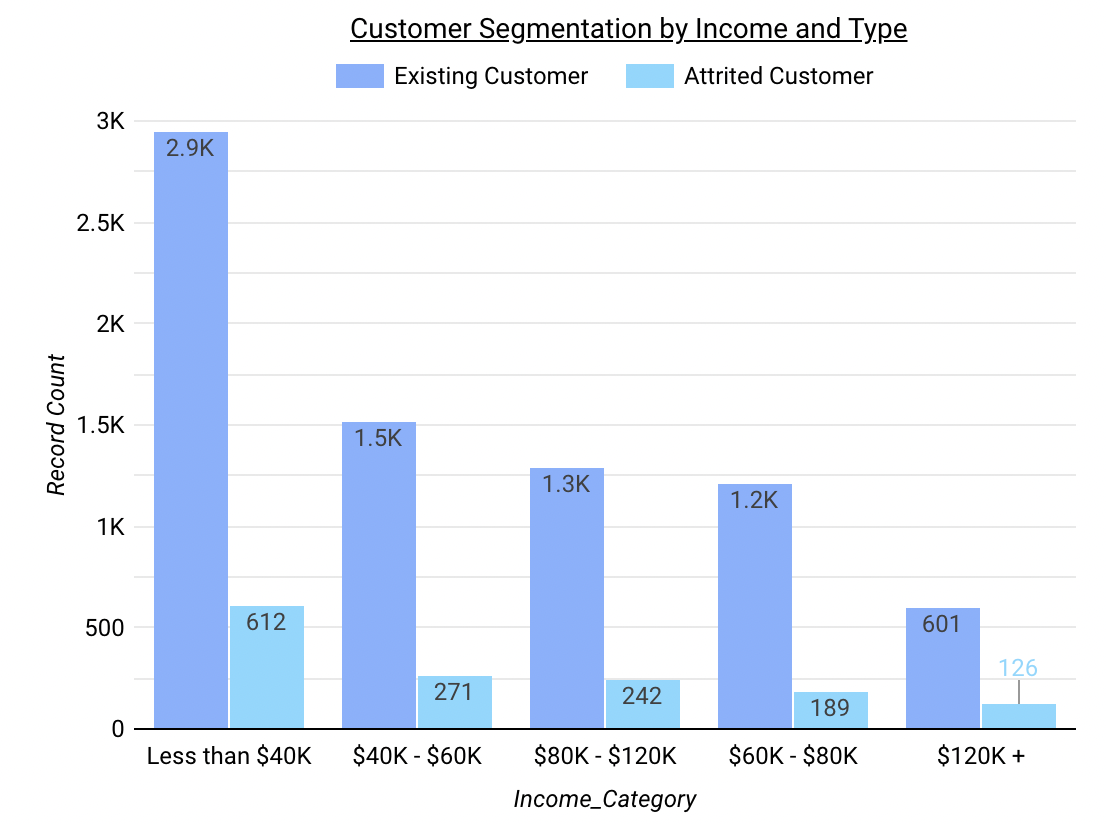

In [ ]:
Image(filename='/content/B.png')

Majority of our customers have income lower than 40k, followed by those with income between 40k to 60k.

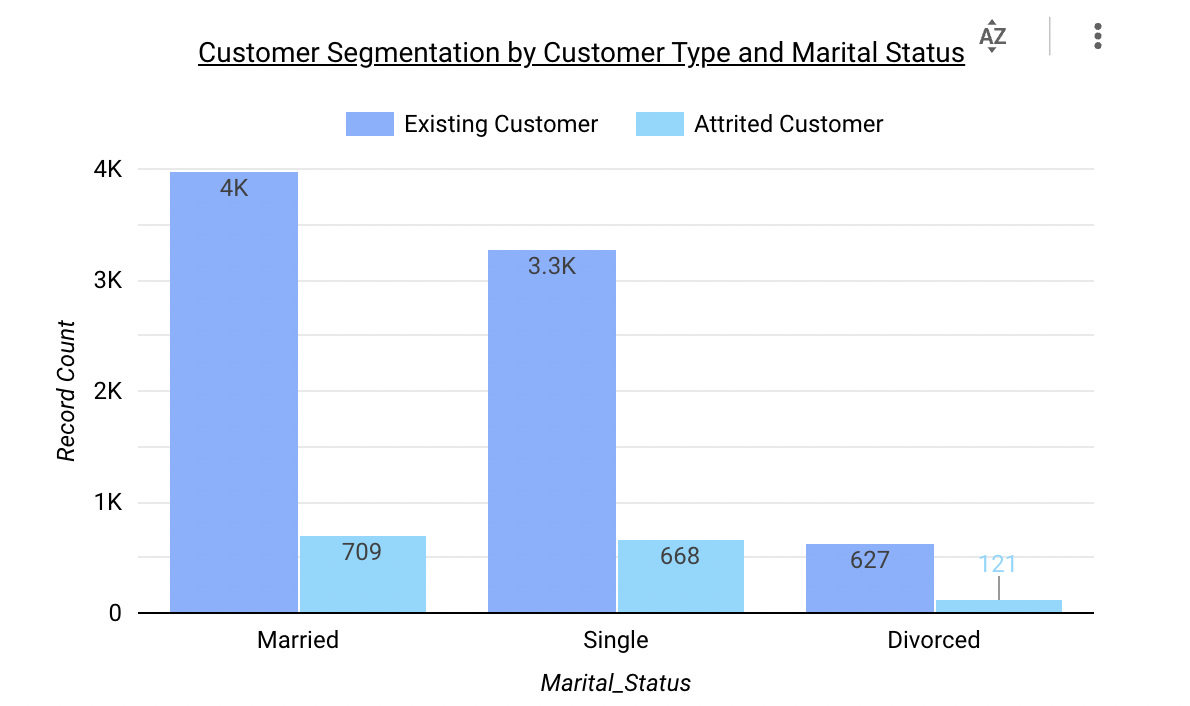

In [ ]:
Image(filename='/content/C.png')

50% of our customers are married, followed by 33.3% as being single.

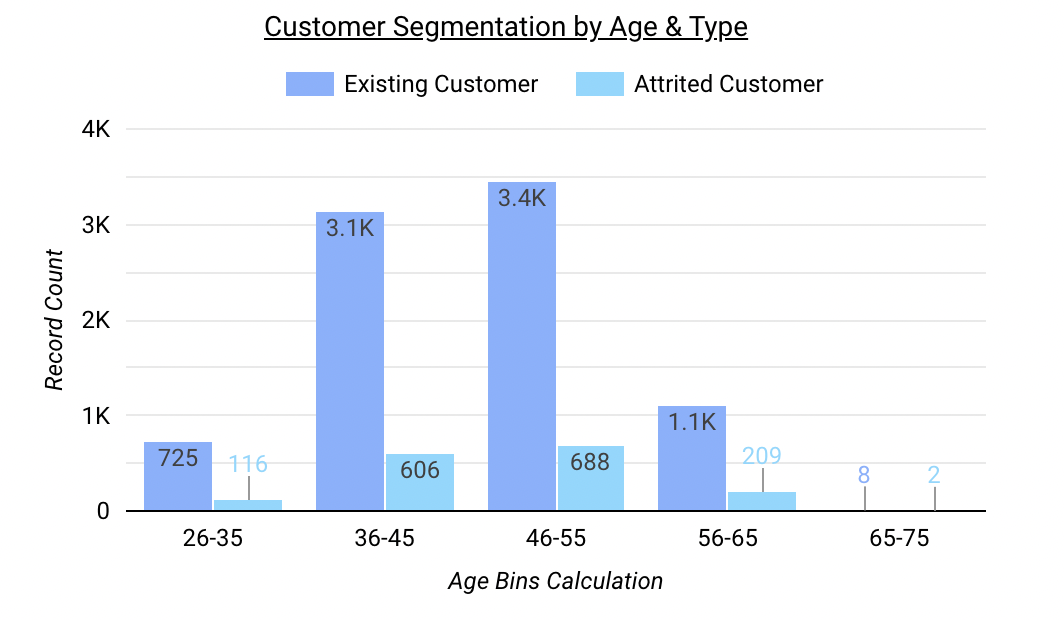

In [ ]:
Image(filename='/content/D.png')

The age distribution of our customer is mostly between 36 to 55 years old.

### **Question 3: What age group of customers has a higher tendency to churn?**

We group customers by the age category to see if each group has different churn rate.

In [58]:
%%bigquery age_tendency --project=ba775-team-project
/* age group tendency */
SELECT SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT)) AS
closed_account,COUNT(*) AS total_account,
SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT))/COUNT(*)*100 AS Churn_rate,
CASE
      WHEN Customer_Age <10 THEN '0-10'
      WHEN Customer_Age <20 THEN '10-20'
      WHEN Customer_Age <30 THEN '20-30'
      WHEN Customer_Age <40 THEN '30-40'
      WHEN Customer_Age <50 THEN '40-50'
      WHEN Customer_Age <60 THEN '50-60'
      WHEN Customer_Age <70 THEN '60-70'
      ELSE '70-80'
End AS Customer_Age
    
FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Customer_Age
ORDER BY Customer_Age

In [59]:
age_tendency

,closed_account,total_account,Churn_rate,Customer_Age
0,17,195,8.717949,20-30
1,261,1841,14.177078,30-40
2,772,4561,16.926113,40-50
3,506,2998,16.877919,50-60
4,71,530,13.396226,60-70
5,0,2,0.000000,70-80


Then we create graphs to see how the age tendency relates with churn rate. We can see the 40-60 group has higher tendency to churn.

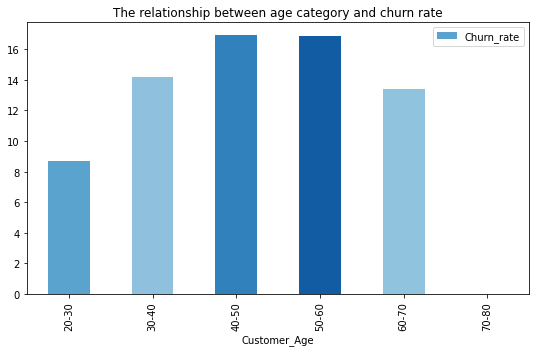

In [61]:
age_tendency.plot(title = 'The relationship between age category and churn rate',kind='bar', x='Customer_Age', y='Churn_rate',color = ['#5ba3cf','#8fc1de','#3181bd','#125ca4','#8fc3de'], figsize=(9, 5));

### **Question 4: Which education category of customers has a higher tendency to churn?**

We group customers by educational level to see if it is related with churn rate.

In [ ]:
%%bigquery Education_Level --project=ba775-team-project
/*educational level tendency*/
SELECT Education_Level, COUNT(*) AS total_account, 
SUM(CAST(Attrition_Flag = 'Attrited Customer' AS INT))
AS closed_account,
SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT))/COUNT(*)*100 AS Churn_rate,
FROM `ba775-team-project.bankchurners.bankchurners`
WHERE Education_Level  NOT LIKE 'Unknown'
GROUP BY Education_Level

In [ ]:
Education_Level

Then we create graphs to see how education level is related with churn rate. We can see people with doctorate degree has highest tendency to churncompare to other groups.

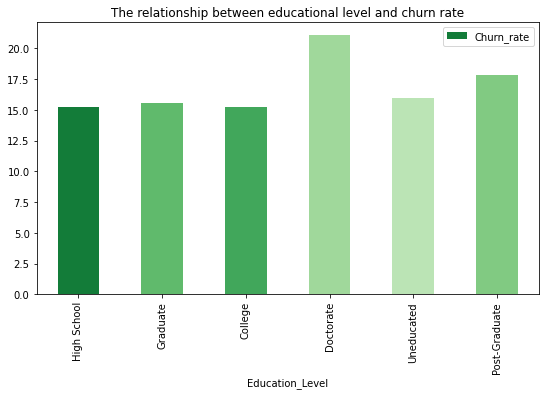

In [62]:
Education_Level.plot(title = 'The relationship between educational level and churn rate',kind='bar', x='Education_Level', y='Churn_rate',color = ['#137c39','#60ba6c','#41a75b','#a0d89b','#bbe4b5','#81ca82'], figsize=(9, 5));

### **Question 5: Which income category of customers has a higher tendency to churn?**

We group customer by income category to see if it is related with churn rate.

In [ ]:
%%bigquery Income_Category --project=ba775-team-project
/*income tendency*/
SELECT Income_Category, COUNT(*) AS total_account, 
SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT)) AS closed_account,
SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT))/COUNT(*)*100 AS Churn_rate,
FROM `ba775-team-project.bankchurners.bankchurners`
WHERE Income_Category  NOT LIKE 'Unknown'
GROUP BY Income_Category
ORDER BY Income_Category

In [ ]:
Income_Category

Then we create graphs to see the income level tendency. We can see middle class income poeple($60k-80K) have lowest tendency to churn. 

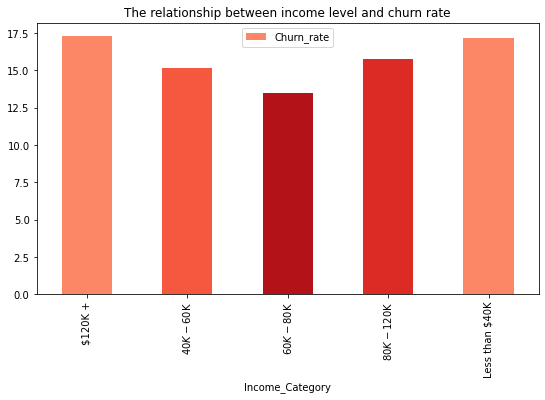

In [63]:
Income_Category.plot(title = 'The relationship between income level and churn rate',kind='bar', x='Income_Category', y='Churn_rate',color = ['#fc8767', '#f6573f', '#b21218', '#dc2a25'], figsize=(9, 5));

### **Question 6: Which marriage type of customers has a higher tendency to churn?**

We group customers by the marital status to see if it is related with churn rate.

In [ ]:
%%bigquery Marital_Status --project=ba775-team-project
/*marital status tendency*/
SELECT Marital_Status, COUNT(*) AS total_account, 
SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT)) AS closed_account,
SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT))/COUNT(*)*100 AS Churn_rate,
FROM `ba775-team-project.bankchurners.bankchurners`
WHERE Marital_Status NOT LIKE 'Unknown'
GROUP BY Marital_Status
ORDER BY Marital_Status;

In [ ]:
Marital_Status

Then we create graphs for the marital status. We can see the divorced or single status people have relatively higher tendency to attrite.

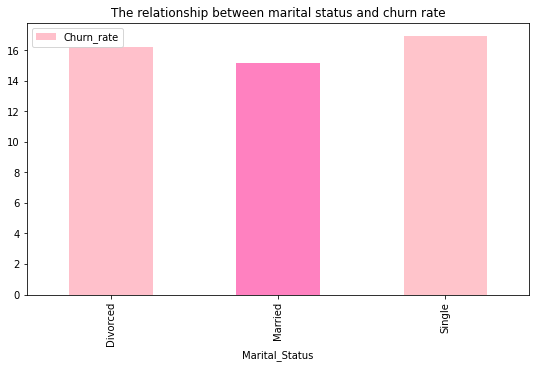

In [64]:
Marital_Status.plot(title = 'The relationship between marital status and churn rate',kind='bar', x='Marital_Status', y='Churn_rate',color = ['#ffc0cb','#ff81c0','#ffc4cb'], figsize=(9, 5));

### **Question 7: How does dependent count influence churn rate?**

We group the customers by how many dependent they carry to see what's the churn rate of each group.

In [ ]:
%%bigquery Dependent_count --project=ba775-team-project
/*dependent tendency*/
SELECT Dependent_count, COUNT(*) AS total_account, 
SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT)) AS closed_account,
SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT))/COUNT(*)*100 AS Churn_rate,
FROM `ba775-team-project.bankchurners.bankchurners`
WHERE Dependent_count IS NOT NULL
GROUP BY Dependent_count
ORDER BY Dependent_count;

In [ ]:
Dependent_count

Then we create graphs to see how amount of dependent peopel carry influence the tendency. We can see people with 3-4 dependent have higher tendency to attrite compare to other groups

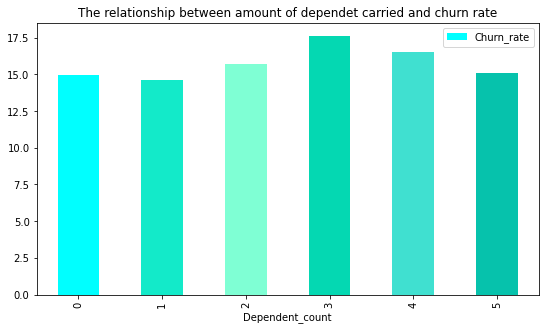

In [65]:
Dependent_count.plot(title = 'The relationship between amount of dependet carried and churn rate',kind='bar', x='Dependent_count', y='Churn_rate',color = ['#00ffff','#13eac9','#7fffd4','#04d8b2','#40e0d0','#06c2ac'], figsize=(9, 5));

### **Question 8: Which card type of customers has a higher tendency to churn?**

We group customers by the card category to see if it's related with churn rate.

Firstly we calculate the number of customers in different Card_Category to see the contribution of the variable itself.

In [ ]:
%%bigquery Card_distribution --project=ba775-team-project
SELECT
Card_Category, 
COUNT(Card_Category) AS Customer_num,
FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Card_Category
ORDER BY Customer_num DESC

In [ ]:
Card_distribution

,Card_Category,Customer_num
0,Blue,9436
1,Silver,555
2,Gold,116
3,Platinum,20


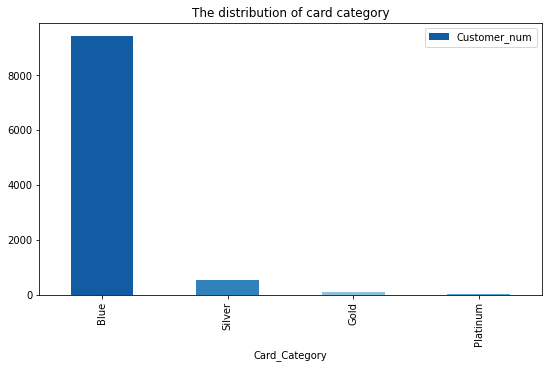

In [ ]:
Card_distribution.plot(title = 'The distribution of card category',kind='bar', 
                       x='Card_Category', y='Customer_num',
                 color = ['#125ca4','#3181bd','#8fc1de','#5ba3cf'], figsize=(9, 5));

In [ ]:
%%bigquery Card_impact --project=ba775-team-project
SELECT
Card_Category, 
COUNT(CLIENTNUM) AS Total_Customer,
SUM(CASE WHEN Attrition_Flag = "Attrited Customer" THEN 1 ELSE 0 END) AS Churn_Customer,
SUM(CASE WHEN Attrition_Flag = "Attrited Customer" THEN 1 ELSE 0 END)/COUNT(CLIENTNUM)*100 AS Churn_Rate
FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Card_Category
ORDER BY Total_Customer DESC

In [ ]:
Card_impact

,Card_Category,Total_Customer,Churn_Customer,Churn_Rate
0,Blue,9436,1519,16.097923
1,Silver,555,82,14.774775
2,Gold,116,21,18.103448
3,Platinum,20,5,25.000000


We create graphs to see the tendency. We can see the customers who have blue card or platinum card are more likely to attrite.

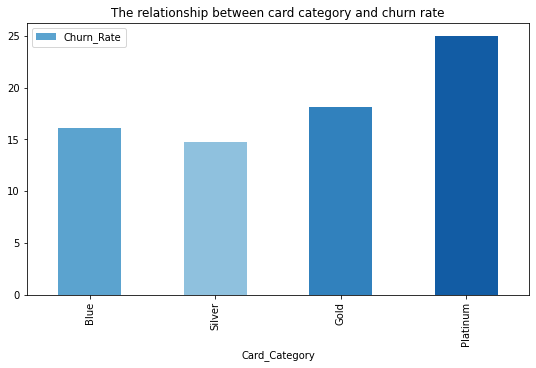

In [ ]:
Card_impact.plot(title = 'The relationship between card category and churn rate',
                 kind='bar', x='Card_Category', y='Churn_Rate',
                 color = ['#5ba3cf','#8fc1de','#3181bd','#125ca4'], figsize=(9, 5));

In [ ]:
%%bigquery --project=ba775-team-project
SELECT ((SUM(cards * attrition_flag)-(SUM(cards) * SUM(attrition_flag)) / COUNT(*)))
  / (SQRT(SUM(cards * cards)-(SUM(cards) * SUM (cards)) / COUNT(*) ) * SQRT(SUM(attrition_flag * attrition_flag)
  -(SUM(attrition_flag) * SUM(attrition_flag)) / COUNT(*))) AS corr
FROM 
(
  SELECT 
  CASE WHEN card_category = 'Blue' THEN 1
       WHEN card_category = 'Silver' THEN 2
       WHEN card_category = 'Gold' THEN 3
       ELSE 4 END as cards,    
  CAST(Attrition_Flag = 'Attrited Customer' AS INT) As attrition_flag
  FROM ba775-team-project.bankchurners.bankchurners
)

,corr
0,0.002354


When we assign each card category a value (assending as the category becomes more prestigious), the calculation below shows that there is no correlation between card category and whether the customer will churn.

### **Question 9: How does credit limit affect churn rate?**

Firstly we calculate the number of customers in different Credit_Limit to see the contribution of the variable itself.

In [ ]:
%%bigquery Credit_distribution --project=ba775-team-project
SELECT
CASE
    WHEN Credit_Limit>=0 AND Credit_Limit <5000 THEN '0-5000'
    WHEN Credit_Limit>=5000 AND Credit_Limit <10000 THEN '05000-10000'
    WHEN Credit_Limit>=10000 AND Credit_Limit <15000 THEN '10000-15000'
    WHEN Credit_Limit>=15000 AND Credit_Limit <20000 THEN '15000-20000'
    WHEN Credit_Limit>=20000 AND Credit_Limit <25000 THEN '20000-25000'
    WHEN Credit_Limit>=25000 AND Credit_Limit <30000 THEN '25000-30000'
    WHEN Credit_Limit>=30000 AND Credit_Limit <35000 THEN '30000-35000'
END as Credit_Limit,
COUNT(Credit_Limit) AS Customer_num,
FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Credit_Limit
ORDER BY Credit_Limit

In [ ]:
Credit_distribution

,Credit_Limit,Customer_num
0,0-5000,5358
1,05000-10000,2015
2,10000-15000,941
3,15000-20000,549
4,20000-25000,372
5,25000-30000,225
6,30000-35000,667


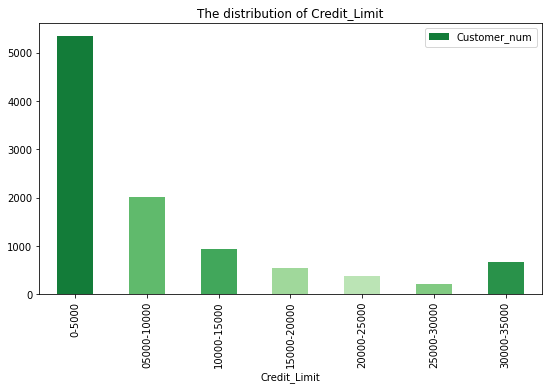

In [ ]:
Credit_distribution.plot(title = 'The distribution of Credit_Limit',kind='bar', x='Credit_Limit', y='Customer_num',
                 color = ['#137c39','#60ba6c','#41a75b','#a0d89b','#bbe4b5','#81ca82','#29924a'], figsize=(9, 5));

We divide the number of attrited customers by the total number of customers group by the Credit_Limit to see whether the credit limit will affect the churn rate.

In [ ]:
%%bigquery Credit_impact --project=ba775-team-project
SELECT
CASE
    WHEN Credit_Limit>=0 AND Credit_Limit <5000 THEN '0-5000'
    WHEN Credit_Limit>=5000 AND Credit_Limit <10000 THEN '05000-10000'
    WHEN Credit_Limit>=10000 AND Credit_Limit <15000 THEN '10000-15000'
    WHEN Credit_Limit>=15000 AND Credit_Limit <20000 THEN '15000-20000'
    WHEN Credit_Limit>=20000 AND Credit_Limit <25000 THEN '20000-25000'
    WHEN Credit_Limit>=25000 AND Credit_Limit <30000 THEN '25000-30000'
    WHEN Credit_Limit>=30000 AND Credit_Limit <35000 THEN '30000-35000'
END as Credit_Limit,
SUM(CAST(Attrition_Flag = 'Attrited Customer' AS INT)) AS Churn_Customer,
COUNT(*) AS Total_Customer,
SUM(CAST(Attrition_Flag = 'Attrited Customer' AS INT))/COUNT(*)*100 AS Churn_Rate

FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Credit_Limit
ORDER BY Credit_Limit

In [ ]:
Credit_impact

,Credit_Limit,Churn_Customer,Total_Customer,Churn_Rate
0,0-5000,926,5358,17.282568
1,05000-10000,302,2015,14.987593
2,10000-15000,145,941,15.409139
3,15000-20000,70,549,12.750455
4,20000-25000,43,372,11.559140
5,25000-30000,33,225,14.666667
6,30000-35000,108,667,16.191904


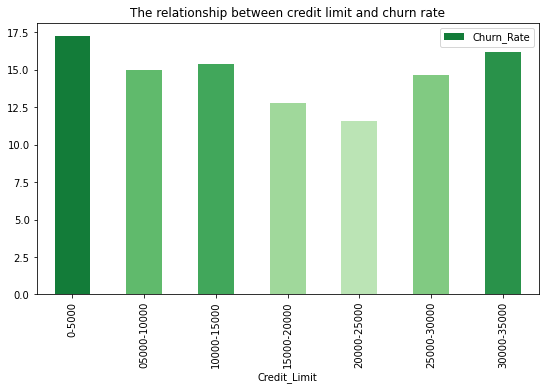

In [ ]:
Credit_impact.plot(title = 'The relationship between credit limit and churn rate', kind='bar', 
                   x='Credit_Limit', y='Churn_Rate', 
                   color = ['#137c39','#60ba6c','#41a75b','#a0d89b','#bbe4b5','#81ca82','#29924a'], figsize=(9, 5));

Create graphs to see the tendency. We can see there is no significant relationship between credit limit and churn rate.

In [ ]:
%%bigquery --project=ba775-team-project
SELECT ((SUM(credit_limit * attrition_flag)-(SUM(credit_limit) * SUM(attrition_flag)) / COUNT(*)))
  / (SQRT(SUM(credit_limit * credit_limit)-(SUM(credit_limit) * SUM (credit_limit)) / COUNT(*) ) * SQRT(SUM(attrition_flag * attrition_flag)
  -(SUM(attrition_flag) * SUM(attrition_flag)) / COUNT(*))) AS corr
FROM
(
  SELECT
  credit_limit,
  CAST(Attrition_Flag = 'Attrited Customer' AS INT) As attrition_flag
  FROM ba775-team-project.bankchurners.bankchurners
)

,corr
0,-0.023873


The calculation of correlation coefficient also shows that there is no significant relationship between credit limit and loss of customer.

### **Question 10: How does the number of contacts by sales representative in the past 12 month affect churn rate?**

In [ ]:
%%bigquery ContactNum_distribution --project=ba775-team-project
SELECT 
CASE
  WHEN Contacts_Count_12_mon=0 THEN 'Contacts_0'
  WHEN Contacts_Count_12_mon=1 THEN 'Contacts_1'
  WHEN Contacts_Count_12_mon=2 THEN 'Contacts_2'
  WHEN Contacts_Count_12_mon=3 THEN 'Contacts_3'
  WHEN Contacts_Count_12_mon=4 THEN 'Contacts_4'
  WHEN Contacts_Count_12_mon=5 THEN 'Contacts_5'
  WHEN Contacts_Count_12_mon=6 THEN 'Contacts_6'
END as Contacts_Count_12_mon,
COUNT(Contacts_Count_12_mon) AS Customer_num,
FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Contacts_Count_12_mon
ORDER BY Contacts_Count_12_mon

In [ ]:
ContactNum_distribution

,Contacts_Count_12_mon,Customer_num
0,Contacts_0,399
1,Contacts_1,1499
2,Contacts_2,3227
3,Contacts_3,3380
4,Contacts_4,1392
5,Contacts_5,176
6,Contacts_6,54


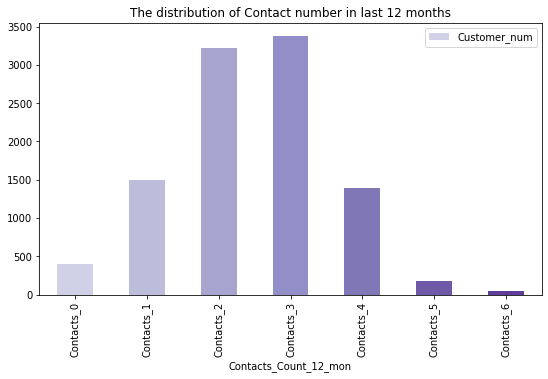

In [ ]:
ContactNum_distribution.plot(title = 'The distribution of Contact number in last 12 months',kind='bar', 
                           x='Contacts_Count_12_mon', y='Customer_num',
                 color = ['#d0d0e6','#bcbcdb','#a7a5cf','#928ec8','#7f77b6','#6f5aa8','#5f3c99'], figsize=(9, 5));

We divide the number of attrited customers by the total number of customers group by the Contacts_Count_12_mon to see whether the number of contacts in last 12 months will affect the churn rate.

In [ ]:
%%bigquery ContactNum_impact --project=ba775-team-project
SELECT 
CASE
  WHEN Contacts_Count_12_mon=0 THEN 'Contacts_0'
  WHEN Contacts_Count_12_mon=1 THEN 'Contacts_1'
  WHEN Contacts_Count_12_mon=2 THEN 'Contacts_2'
  WHEN Contacts_Count_12_mon=3 THEN 'Contacts_3'
  WHEN Contacts_Count_12_mon=4 THEN 'Contacts_4'
  WHEN Contacts_Count_12_mon=5 THEN 'Contacts_5'
  WHEN Contacts_Count_12_mon=6 THEN 'Contacts_6'
END as Contacts_Count_12_mon,
SUM(CAST(Attrition_flag='Attrited Customer' AS INT)) AS Churn_Customer,
COUNT(*) AS Total_Customer,
SUM(CAST(Attrition_flag='Attrited Customer' AS INT))/COUNT(*)*100 AS Churn_Rate
FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Contacts_Count_12_mon
ORDER BY Contacts_Count_12_mon

In [ ]:
ContactNum_impact

,Contacts_Count_12_mon,Churn_Customer,Total_Customer,Churn_Rate
0,Contacts_0,7,399,1.754386
1,Contacts_1,108,1499,7.204803
2,Contacts_2,403,3227,12.488379
3,Contacts_3,681,3380,20.147929
4,Contacts_4,315,1392,22.629310
5,Contacts_5,59,176,33.522727
6,Contacts_6,54,54,100.000000


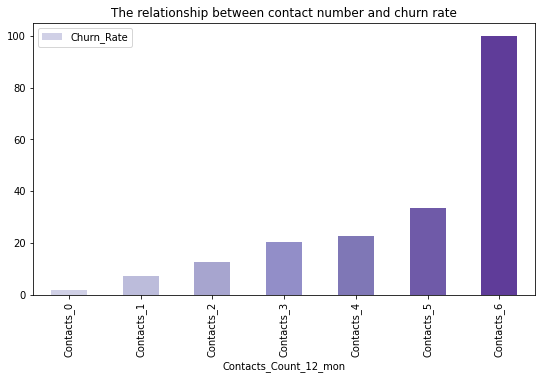

In [ ]:
ContactNum_impact.plot(title = 'The relationship between contact number and churn rate', kind='bar', 
                       x='Contacts_Count_12_mon', y='Churn_Rate', 
                       color = ['#d0d0e6','#bcbcdb','#a7a5cf','#928ec8','#7f77b6','#6f5aa8','#5f3c99'], figsize=(9, 5));

Create graphs to see the tendency. We can see there is a positive relationship between the number of contacts and churn rate.

In [ ]:
%%bigquery --project=ba775-team-project
SELECT ((SUM(Contacts_Count_12_mon * attrition_flag)-(SUM(Contacts_Count_12_mon) * SUM(attrition_flag)) / COUNT(*)))
  / (SQRT(SUM(Contacts_Count_12_mon * Contacts_Count_12_mon)-(SUM(Contacts_Count_12_mon) * 
  SUM (Contacts_Count_12_mon)) / COUNT(*) ) * SQRT(SUM(attrition_flag * attrition_flag)
  -(SUM(attrition_flag) * SUM(attrition_flag)) / COUNT(*))) AS corr
FROM 
(
  SELECT
  Contacts_Count_12_mon,
  CAST(Attrition_Flag = 'Attrited Customer' AS INT) AS attrition_flag
  FROM ba775-team-project.bankchurners.bankchurners
)

,corr
0,0.204491


The correlation coefficient of contacts and attrition flag shows that there is a positive relationship between the two rows.

### **Question 11: How does time length as being our customer affect churn rate?**

In [ ]:
%%bigquery Month_distribution --project=ba775-team-project
SELECT 
CASE
      WHEN Months_on_Book>=10 AND Months_on_Book <20 then '10-19'
      WHEN Months_on_Book>=20 AND Months_on_Book <30 then '20-29'
      WHEN Months_on_Book>=30 AND Months_on_Book <40 then '30-39'
      ELSE '>= 40'
End as Months_on_Book,
COUNT(Months_on_Book) AS Customer_num,
FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Months_on_Book
ORDER BY Months_on_Book

In [ ]:
Month_distribution

,Months_on_Book,Customer_num
0,10-19,309
1,20-29,1611
2,30-39,5391
3,>= 40,2816


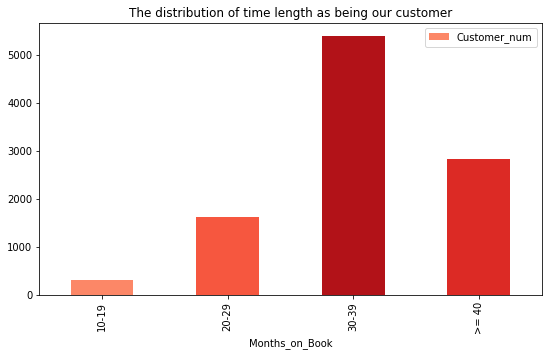

In [ ]:
Month_distribution.plot(title = 'The distribution of time length as being our customer',kind='bar', 
                           x='Months_on_Book', y='Customer_num',
                 color = ['#fc8767', '#f6573f', '#b21218', '#dc2a25'], figsize=(9, 5));

We divide the number of attrited customers by the total number of customers group by the Months_on_book to see whether the time length as being our customer will affect the churn rate.

In [ ]:
%%bigquery Time_impact --project=ba775-team-project
SELECT
CASE
      WHEN Months_on_Book>=10 AND Months_on_Book <20 then '10-19'
      WHEN Months_on_Book>=20 AND Months_on_Book <30 then '20-29'
      WHEN Months_on_Book>=30 AND Months_on_Book <40 then '30-39'
      ELSE '>= 40'
End as Months_on_Book,
SUM(CAST(Attrition_Flag = 'Attrited Customer' AS INT)) AS Churn_Customer,
COUNT(*) AS Total_Customer,
SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT))/COUNT(*)*100 AS Churn_Rate

FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Months_on_Book
ORDER BY Months_on_Book

In [ ]:
Time_impact

,Months_on_Book,Churn_Customer,Total_Customer,Churn_Rate
0,10-19,43,309,13.915858
1,20-29,238,1611,14.773433
2,30-39,899,5391,16.675941
3,>= 40,447,2816,15.873580


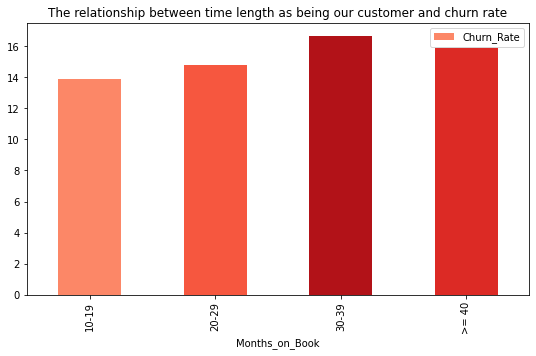

In [ ]:
Time_impact.plot(title = 'The relationship between time length as being our customer and churn rate', kind='bar', 
                 x='Months_on_Book', y='Churn_Rate', color = ['#fc8767', '#f6573f', '#b21218', '#dc2a25'],figsize=(9, 5));

Create graphs to see the tendency. We can see the time lengh does affect the churn rate below 39 months, however, it seems to be less influential when it's longer 40 months.

In [ ]:
%%bigquery --project=ba775-team-project
SELECT ((SUM(months_on_book * attrition_flag)-(SUM(months_on_book) * SUM(attrition_flag)) / COUNT(*)))
  / (SQRT(SUM(months_on_book * months_on_book)-(SUM(months_on_book) * SUM (months_on_book)) / COUNT(*) ) 
  * SQRT(SUM(attrition_flag * attrition_flag)
  -(SUM(attrition_flag) * SUM(attrition_flag)) / COUNT(*))) AS corr
FROM 
(
  SELECT 
  months_on_book,
  CAST(Attrition_Flag = 'Attrited Customer' AS INT) AS attrition_flag
  FROM ba775-team-project.bankchurners.bankchurners
)

,corr
0,0.013687


Below is the correlation between months on book and whether it is a churned customer. Similar to the results of the graphs, there is no significant correlation between the two rows. 

### **Question 12: How does the number of other existing service affect churn rate?**

In [ ]:
%%bigquery Relation_Impact --project=ba775-team-project
SELECT 
  Total_Relationship_Count AS Total_Products, 
  SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT)) AS Churned_Accounts,
  COUNT(*) AS Total_Accounts, 
  SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT))/COUNT(*)*100 AS Churn_Rate,
FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Total_Relationship_Count
ORDER BY Total_Relationship_Count;

As seen in the table below, customers in the 1-2 product category have the highest churn rates whereas churn rates are observed to be lower for customers with higher number of products.

In [ ]:
Relation_Impact.plot(title = 'Relationship Between Number of Products & Churn Rates',kind='bar', x='Total_Products', y='Churn_Rate',color = ['#5ba3cf','#8fc1de','#3181bd','#125ca4','#8fc3de'], figsize=(9, 5));

In [ ]:
Relation_Impact

Correlation analysis between total number of products and churn rates: -0.15 which shows a negative but weak correlation between the two variables.

In [ ]:
%%bigquery --project=ba775-team-project
SELECT ((SUM(Total_Relationship_Count * attrition_flag)
  -(SUM(Total_Relationship_Count) * SUM(attrition_flag)) / COUNT(*))) / (SQRT(SUM(Total_Relationship_Count * Total_Relationship_Count) 
  -(SUM(Total_Relationship_Count) * SUM (Total_Relationship_Count)) / COUNT(*) ) * SQRT(SUM(attrition_flag * attrition_flag)
  -(SUM(attrition_flag) * SUM(attrition_flag)) / COUNT(*))) AS corr
FROM
(SELECT 
  Total_Relationship_Count,
  CAST(Attrition_Flag = 'Attrited Customer' AS INT) AS attrition_flag
  FROM ba775-team-project.bankchurners.bankchurners)

### **Question 13: How does transaction amount affect churn rate?**

We divide the number of attrited customers by the total number of customers group by the total transcation amount to see whether the amount our customer spend will affect the churn rate.

In [66]:
%%bigquery Total_Trans_Amt --project=ba775-team-project
/* transacation amount tendency */
SELECT SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT)) AS closed_account,
COUNT(*) AS total_account,SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT))/
COUNT(*)*100 AS Churn_rate,
CASE
      WHEN Total_Trans_Amt <4000 THEN '0-4000'
      WHEN Total_Trans_Amt <8000 THEN '4000-8000'
      WHEN Total_Trans_Amt <12000 THEN '8000-12000'
      WHEN Total_Trans_Amt <16000 THEN '12000-16000'
      ELSE '16000-20000'
End AS Total_Trans_Amt
    
FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Total_Trans_Amt

In [67]:
Total_Trans_Amt

,closed_account,total_account,Churn_rate,Total_Trans_Amt
0,1318,5287,24.929071,0-4000
1,156,3751,4.158891,4000-8000
2,153,343,44.606414,8000-12000
3,0,657,0.000000,12000-16000
4,0,89,0.000000,16000-20000


Create graphs to see the tendency. We can see the customers with transacation amount below 4k tend to have a high churn rate. and customers with transcation amount between 8k to 12K have the highest churn rate. Moreover customers with transcation amount above 12k tend to stuck with us.

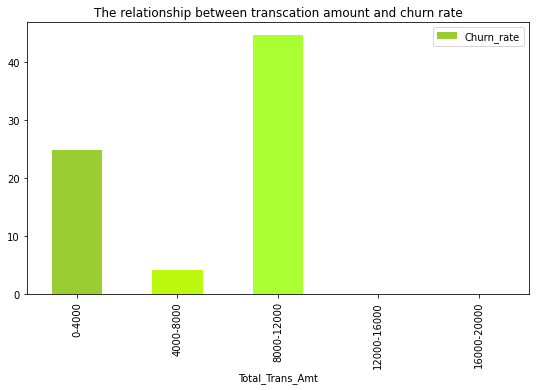

In [69]:
Total_Trans_Amt.plot(title = 'The relationship between transcation amount and churn rate', kind='bar', 
                       x='Total_Trans_Amt', y='Churn_rate', 
                       color = ['#9acd32','#bbf90f','#aaff32','#ffff14','#ffff00'], figsize=(9, 5));

### **Question 14: How does revolving balance affect churn rate?**

We divide the number of attrited customers by the total number of customers group by the total revolving balance to see whether the revolving balance will affect the churn rate.

In [70]:
%%bigquery Total_Revolving_Bal --project=ba775-team-project
/* revolving amount tendency */
SELECT SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT)) AS closed_account,
COUNT(*) AS total_account,SUM(CAST(Attrition_Flag = 'Attrited Customer'AS int))/
COUNT(*)*100 AS Churn_rate,
CASE
      WHEN Total_Revolving_Bal <500 THEN  '0-500'
      WHEN Total_Revolving_Bal <1000 THEN '0500-1000'
      WHEN Total_Revolving_Bal <1500 THEN '1000-1500'
      WHEN Total_Revolving_Bal <2000 THEN '1500-2000'
      ELSE '2000-2500'
End AS Total_Revolving_Bal
    
FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Total_Revolving_Bal
ORDER BY Total_Revolving_Bal

In [71]:
Total_Revolving_Bal

,closed_account,total_account,Churn_rate,Total_Revolving_Bal
0,998,2595,38.458574,0-500
1,163,1316,12.386018,0500-1000
2,103,2257,4.563580,1000-1500
3,108,2287,4.722344,1500-2000
4,255,1672,15.251196,2000-2500


Create graphs to see the tendency. We can see the revolving balance does affect the churn rate. customers with very low revolving balance tends to have a very high churn rate.

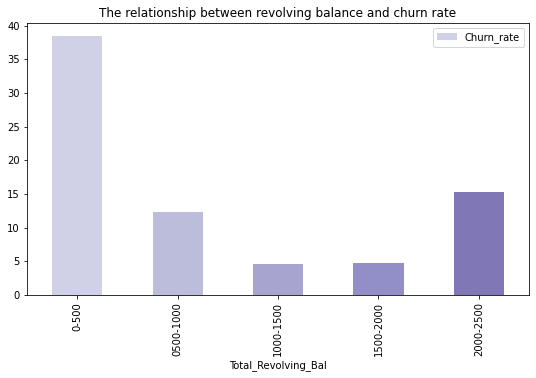

In [73]:
Total_Revolving_Bal.plot(title = 'The relationship between revolving balance and churn rate', kind='bar', 
                       x='Total_Revolving_Bal', y='Churn_rate', 
                       color = ['#d0d0e6','#bcbcdb','#a7a5cf','#928ec8','#7f77b6'], figsize=(9, 5));

Ann: I just put all the variables to see the relationship with revolving balance. But I think it's too much because the customer_count is really small. I think it's better to remove one of them(maybe age?) but I'm not sure. What do you think?

In [74]:
%%bigquery RevBal_high --project=ba775-team-project
SELECT
CASE 
      WHEN Customer_Age >20 AND Customer_Age <=30 THEN '21-30'
      WHEN Customer_Age >30 AND Customer_Age <=40 THEN '31-40'
      WHEN Customer_Age >40 AND Customer_Age <=50 THEN '41-50'
      WHEN Customer_Age >50 AND Customer_Age <=60 THEN '51-60'
      ELSE '>61'
End AS Customer_Age,
Income_Category, Education_Level, Card_Category, COUNT(Card_Category) AS Customer_count FROM `ba775-team-project.bankchurners.bankchurners`
WHERE Total_Revolving_Bal >= 2000 AND Income_Category NOT LIKE '%Unknown' AND Education_Level NOT LIKE '%Unknown' AND Card_Category NOT LIKE '%Unknown'
GROUP BY Customer_Age, Income_Category, Education_Level, Card_Category
ORDER BY Customer_count DESC
LIMIT 4

In [75]:
RevBal_high

,Customer_Age,Income_Category,Education_Level,Card_Category,Customer_count
0,41-50,Less than $40K,Graduate,Blue,75
1,51-60,Less than $40K,Graduate,Blue,47
2,41-50,Less than $40K,High School,Blue,47
3,41-50,$80K - $120K,Graduate,Blue,39


In [76]:
%%bigquery RevBal_low --project=ba775-team-project
SELECT 
CASE 
      WHEN Customer_Age >20 AND Customer_Age <=30 THEN '21-30'
      WHEN Customer_Age >30 AND Customer_Age <=40 THEN '31-40'
      WHEN Customer_Age >40 AND Customer_Age <=50 THEN '41-50'
      WHEN Customer_Age >50 AND Customer_Age <=60 THEN '51-60'
      ELSE '>61'
End AS Customer_Age,
Income_Category, Education_Level, Card_Category, COUNT(Card_Category) AS Customer_count FROM `ba775-team-project.bankchurners.bankchurners`
WHERE Total_Revolving_Bal < 1000 AND Income_Category NOT LIKE '%Unknown' AND Education_Level NOT LIKE '%Unknown' AND Card_Category NOT LIKE '%Unknown'
GROUP BY Customer_Age, Income_Category, Education_Level, Card_Category
ORDER BY Customer_count DESC
LIMIT 4

In [77]:
RevBal_low

,Customer_Age,Income_Category,Education_Level,Card_Category,Customer_count
0,41-50,Less than $40K,Graduate,Blue,183
1,41-50,Less than $40K,High School,Blue,115
2,51-60,Less than $40K,Graduate,Blue,105
3,31-40,Less than $40K,Graduate,Blue,99


In [78]:
%%bigquery regression --project=ba775-team-project
WITH regression AS (
		SELECT 
			slope, 
            ymS - xmS * slope AS intercept
		FROM (
			SELECT
				SUM((x - xm) * (y - ym)) / SUM((x - xm) * (x - xm)) AS slope,
				MAX(xm) AS xmS,
				MAX(ym) AS ymS
			FROM (
				select
					Credit_Limit AS x, AVG(Credit_Limit) OVER() AS xm,
					Total_Revolving_Bal AS y, AVG(Total_Revolving_Bal) OVER() AS ym
				FROM ba775-team-project.bankchurners.bankchurners
			) table1
		) table2
)
SELECT
	Credit_Limit, Total_Revolving_Bal,
	(Credit_Limit * (select slope from regression) + (select intercept from regression)) as predicted_RevolBal
FROM ba775-team-project.bankchurners.bankchurners

In [79]:
regression

,Credit_Limit,Total_Revolving_Bal,predicted_RevolBal
0,2002.0,0,1137.551970
1,12315.0,0,1176.847561
2,34516.0,1380,1261.439961
3,27436.0,642,1234.463059
4,34516.0,2273,1261.439961
...,...,...,...
10122,4742.0,2221,1147.992183
10123,5542.0,0,1151.040421
10124,1438.3,0,1135.404106
10125,9909.0,0,1167.679987


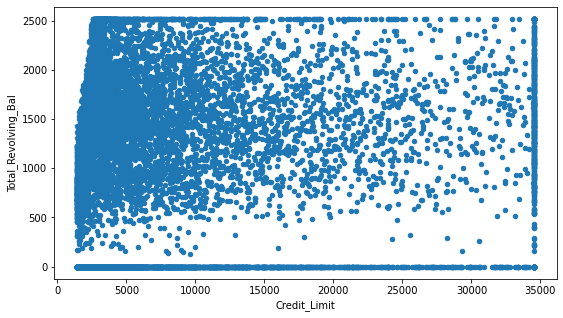

In [80]:
regression.plot(kind='scatter', x='Credit_Limit', y='Total_Revolving_Bal', figsize=(9, 5));

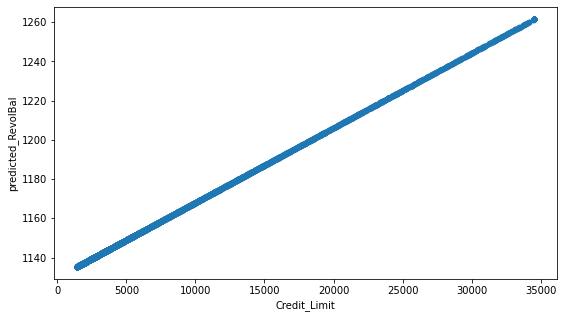

In [81]:
regression.plot(kind='scatter', x='Credit_Limit', y='predicted_RevolBal', figsize=(9, 5));

# **Conclusions**

Through churn analysis, we found that customers in middle age, with doctorate degrees, holding platinum(highest category) cards, having extremely low or high income, and having extremely high or low credit limit have high tendency to churn. The manager should spend more efforts on customers retention for those with these attributes. 

In addition, customers with increased engagement with sales representative, customers with few other bank products, and customers with low revolving balance tend to have high churn rate. We recommend the manager to provide promotion bundles to sell more bank products to increase loyalty, prioritize customers with low balance, and optimize customer service efficiency and quality to reduce churn rate.

While the results of this analysis produced many interesting insights, there are still some limitations in this study. For example, many of the correlation coefficients as mentioned in the analysis are close to zero, which show that there is no significant relationship between the variables and churn rate. This may be because the relationship between the variables and churn rate is non-linear. 




# **Future Studies**

The text or audio analysis can be performed to study why customer service leads to high churn rate. 

Also, a machine learning model can be built with features of age, educational level, card type, income, credit limit, contacts with sales reprepresentative, holdings of other bank products, and revolving balance. With this machine learning model, the manager can predict whether certain customer will tend to attrite in order to prevent attrition beforehead and reduce customer rentention cost.